# Importing KabaddiPy

This exemplar notebook demonstrates the full functionality of the module, including all codes from the paper, to ensure full reproducibility.

In [1]:
!pip install kabaddiPy --upgrade


## Initializing the class

In [2]:
import kabaddiPy

pkl = kabaddiPy.PKL()


## Trying to understand the data by beginning with the season standings

For a researcher unfamiliar with the data or the sport, the team league standings is the natural starting point. By default, the standings for the latest season are returned. 

We will sketch out the analyses by focusing on a past season, season 5. 

In [3]:
display(pkl.get_standings(season=5, qualified=False))


,Group,Season,Team_Id,Team_Name,League_position,Matches_played,Wins,Lost,Tied,Draws,No Result,League_points,Score_diff,Qualified
0,B,5,4,Bengal Warriorz,1,22,11,5,6,0,0,77,19,True
1,B,5,6,Patna Pirates,2,22,10,7,5,0,0,71,60,True
2,B,5,30,UP Yoddhas,3,22,8,10,4,0,0,60,2,True
3,B,5,1,Bengaluru Bulls,4,22,8,11,3,0,0,57,10,False
4,B,5,8,Telugu Titans,5,22,7,12,3,0,0,52,-2,False
5,B,5,29,Tamil Thalaivas,6,22,6,14,2,0,0,46,-71,False
6,A,5,31,Gujarat Giants,1,22,15,4,3,0,0,87,126,True
7,A,5,7,Puneri Paltan,2,22,15,7,0,0,0,80,91,True
8,A,5,28,Haryana Steelers,3,22,13,5,4,0,0,79,40,True
9,A,5,5,U Mumba,4,22,10,12,0,0,0,56,-50,False


## Team Level Analysis

KabaddiPy makes it really easy to get a sense of a team's performance, the points scored, the skills used to score those points and analyzing team strengths by breaking it down to each player. This will help build better team lineups and finetune strategies.

At a glance, we can see where the various team stood, their wins and losses and also whether they qualified to the knockout stages or not.
Importantly, now we have the **team ids** for each team, with which we can dive into team level stats!

In [4]:
metric_rank, metric_value, metric_per_match, raider_skills, defender_skills = pkl.get_team_info(team_id=6,season=5)


The `get_team_info()` function returns all the team information for the specified season in five dataframes including the overall team statistics across metrics and the skills used successfully (or not) by the raiders and defenders.

In [5]:
metric_value


,37
season,5.0
team_id,6
team_name,Patna Pirates
matches_played,26
team-all-outs-conceded_value,29
team-successful-tackle-percent_value,36.16
team-super-raid_value,26
team-raid_value,1173.0
team-successful-raid-percent_value,41.09
team-dod-raid-points_value,95


### How were these points scored?
After getting an overview of all the various points scored, the next question that arises is **how were these points scored**? 

What skills were most successful for the offense and the defense?

In [6]:
# We've already acquired this data from the previous function call. Displaying now.

defender_skills


,Season,Skill Type,Skill Name,Patna Pirates (6)
0,5,Defensive Skill,Ankle,65.0
1,5,Defensive Skill,Other,42.0
2,5,Defensive Skill,Push,33.0
3,5,Defensive Skill,Thigh,17.0
4,5,Defensive Skill,self out,4.0
5,5,Defensive Skill,Knee Hold,NaN
6,5,Defensive Skill,Follow,NaN
7,5,Defensive Skill,Ankle Hold,NaN
8,5,Defensive Skill,Block,NaN
9,5,Defensive Skill,Thigh Hold,NaN


We are able to gather that Pirates' defenders were most successful when they used Ankle hold (Defensive skill) and least successful with thigh hold

## Visualizing team scoring zones (strong/weak)
Now that an analyst has the breakdown of points, they would want to know **where these points** were scored on the Kabaddi mat?

Using `plot_team_zones()` we will plot a heatmap of the strongest and weakest zones of Patna Pirates on the mat 

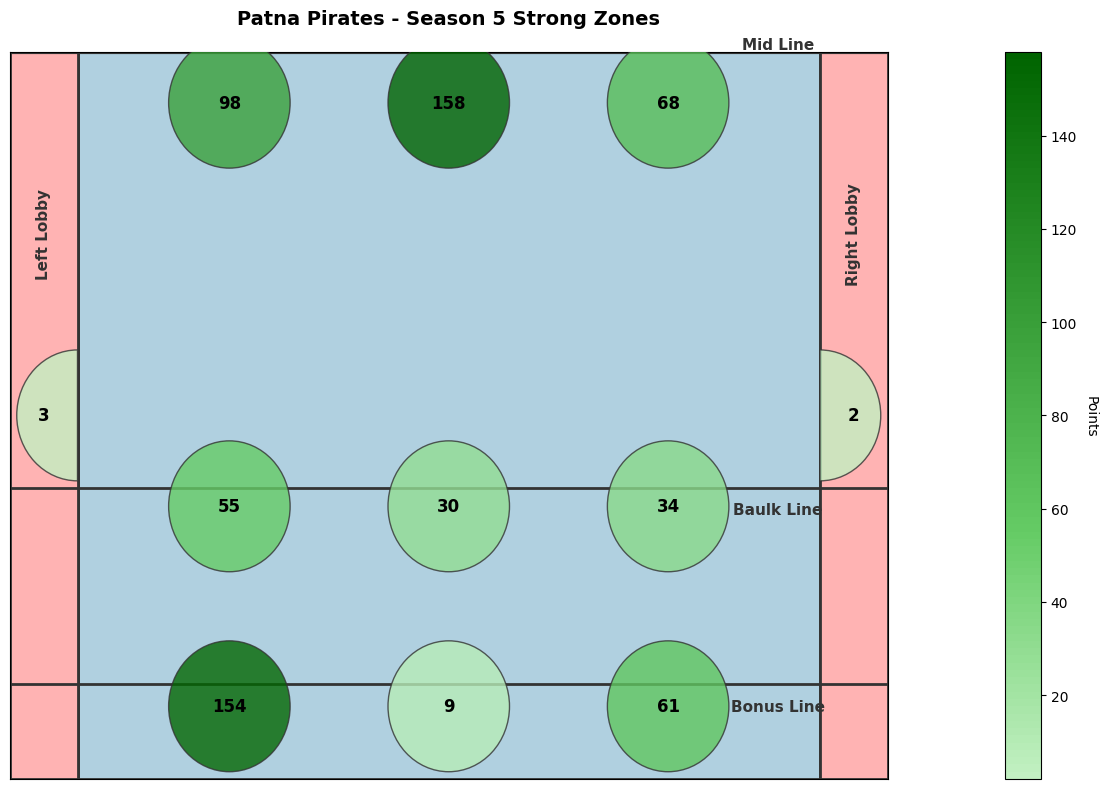

In [7]:
pkl.plot_team_zones(team_id=6, season=5, zone_type='strong')


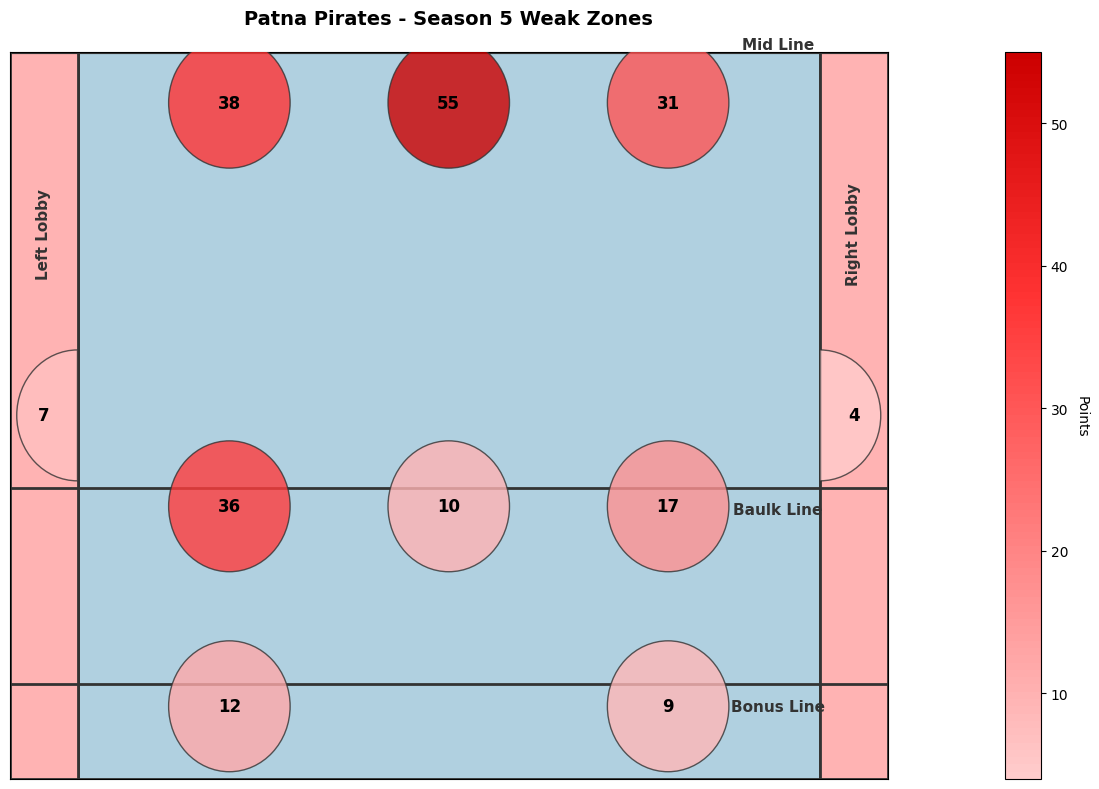

In [8]:
pkl.plot_team_zones(team_id=6, season=5, zone_type='weak')


With this plot, we know exactly where the points were scored for this season.

But, **who scored these points**? Let's use `get_team_roster()` to find out the players in season 5 for Patna Pirates

In [9]:
roster = pkl.get_team_roster(team_id=6, season=5)
roster[['Player ID', 'Name', 'Played Count', 'Total Points', 'Team ID', 'Team Name', 'Total Matches in Season', 'Starter Count',
        'Top Raider Count', 'Top Defender Count','Captain Count', 'Played Count',
       'Green Card Count', 'Yellow Card Count', 'Red Card Count']]


,Player ID,Name,Played Count,Total Points,Team ID,Team Name,Total Matches in Season,Starter Count,Top Raider Count,Top Defender Count,Captain Count,Played Count,Green Card Count,Yellow Card Count,Red Card Count
0,197,Pardeep Narwal,26,369,6,Patna Pirates,26,26,22,0,26,26,0,0,0
1,123,Vishal Mane,26,39,6,Patna Pirates,26,26,0,5,0,26,0,0,0
2,165,Sachin Shingade,26,22,6,Patna Pirates,26,26,0,1,0,26,0,0,0
3,745,Vijay,23,64,6,Patna Pirates,26,15,0,3,0,23,0,0,0
4,388,Monu Goyat,26,202,6,Patna Pirates,26,26,4,0,0,26,0,0,0
5,390,Jawahar Dagar,18,35,6,Patna Pirates,26,15,0,3,0,18,0,0,0
6,579,Jaideep,26,71,6,Patna Pirates,26,26,0,12,0,26,0,0,0
7,342,Zakir Hossain,18,0,6,Patna Pirates,26,0,0,0,0,18,0,0,0
8,299,Sandeep,15,0,6,Patna Pirates,26,0,0,0,0,15,0,0,0
9,728,Manish,26,22,6,Patna Pirates,26,0,0,1,0,26,0,0,0


### Visualizing player contribution to team strength
We can easily see who were the top scorers! But each of these players have different areas of strength.

To analyze their contribution to team strength, we will plot a grid of top scorers' strong zones.

/Users/annimukh/miniconda3/envs/cmu/lib/python3.10/site-packages/kabaddiPy/kabaddiPy.py:1807: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


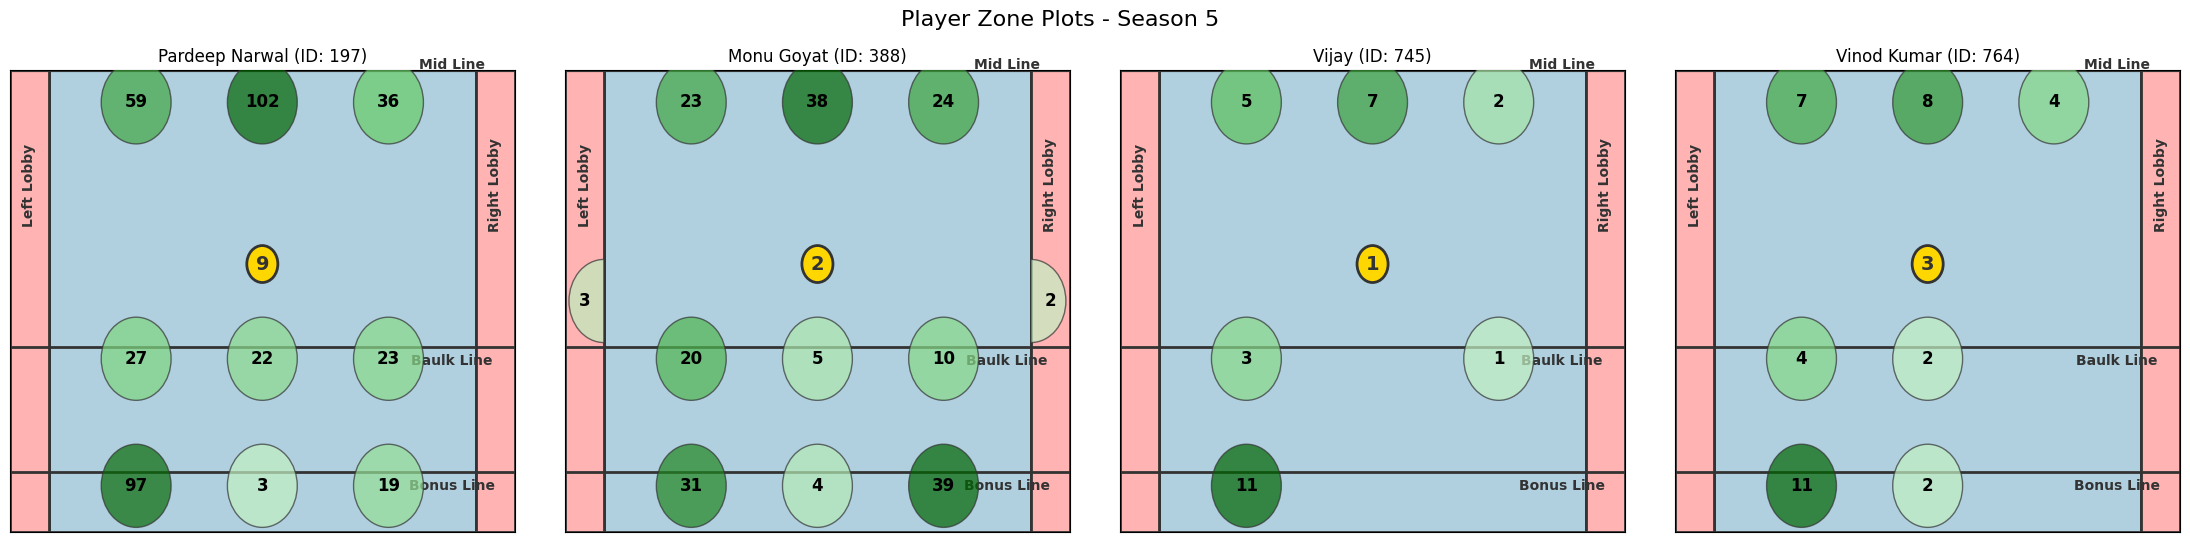

In [10]:
pkl.plot_player_zones_grid(player_ids=[197, 388, 745, 764], season=5)


## Match Level Analysis

There are two ways of isolating a pivotal match - by a season or for a particular team.

`KabaddiPy` makes it very simple to do both, with `get_season_matches()` and `get_team_matches()`. More functions are provided for play-by-play analysis and retrival of all data related to a match.

In [11]:
#sorting by descending Match_ID to get the latest match in the season
df = pkl.get_season_matches(season=10)
df.sort_values(by='Match_ID', ascending=False)


,Season,Match_ID,Match_Name,League_Stage,Year,Venue,Match_Outcome,Start_Date,End_Date,Result,Winning Margin,team_score_1,team_score_2,team_name_1,team_id_1,team_name_2,team_id_2
136,10,3165,Final,Final,2023,"Gmc Balayogi Sports Complex, Gachibowli, Hyder...",Puneri Paltan won by 3 Pts,2024-03-01T20:00+05:30,2024-03-01T20:00+05:30,W,3,28,25,Puneri Paltan,7,Haryana Steelers,28
135,10,3164,Semi Final 2,Semi Final,2023,"Gmc Balayogi Sports Complex, Gachibowli, Hyder...",Haryana Steelers won by 4 Pts,2024-02-28T21:00+05:30,2024-02-28T21:00+05:30,W,4,27,31,Jaipur Pink Panthers,3,Haryana Steelers,28
134,10,3163,Semi Final 1,Semi Final,2023,"Gmc Balayogi Sports Complex, Gachibowli, Hyder...",Puneri Paltan won by 16 Pts,2024-02-28T20:00+05:30,2024-02-28T20:00+05:30,W,16,37,21,Puneri Paltan,7,Patna Pirates,6
133,10,3162,Eliminator 2,Playoffs,2023,"Gmc Balayogi Sports Complex, Gachibowli, Hyder...",Haryana Steelers won by 17 Pts,2024-02-26T21:00+05:30,2024-02-26T21:00+05:30,W,17,25,42,Gujarat Giants,31,Haryana Steelers,28
132,10,3161,Eliminator 1,Playoffs,2023,"Gmc Balayogi Sports Complex, Gachibowli, Hyder...",Patna Pirates won by 2 Pts,2024-02-26T20:00+05:30,2024-02-26T20:00+05:30,W,2,35,37,Dabang Delhi K.C.,2,Patna Pirates,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10,3033,Match 5,League,2023,"Eka Arena By Transstadia, Ahmedabad",Puneri Paltan won by 4 Pts,2023-12-04T20:00+05:30,2023-12-04T20:00+05:30,W,4,37,33,Puneri Paltan,7,Jaipur Pink Panthers,3
3,10,3032,Match 4,League,2023,"Eka Arena By Transstadia, Ahmedabad",Gujarat Giants won by 3 Pts,2023-12-03T21:00+05:30,2023-12-03T21:00+05:30,W,3,34,31,Gujarat Giants,31,Bengaluru Bulls,1
2,10,3031,Match 3,League,2023,"Eka Arena By Transstadia, Ahmedabad",Tamil Thalaivas won by 11 Pts,2023-12-03T20:00+05:30,2023-12-03T20:00+05:30,W,11,42,31,Tamil Thalaivas,29,Dabang Delhi K.C.,2
1,10,3030,Match 2,League,2023,"Eka Arena By Transstadia, Ahmedabad",U Mumba won by 3 Pts,2023-12-02T21:00+05:30,2023-12-02T21:00+05:30,W,3,34,31,U Mumba,5,U.P. Yoddhas,30


Alternatively, matches could be identified for a particular team in focus.

In [12]:
pkl.get_team_matches(season=5, team_id=5)


,Season,Match_ID,Match_Name,League_Stage,Year,Venue,Match_Outcome,Start_Date,End_Date,Result,Winning Margin,team_score_1,team_score_2,team_name_1,team_id_1,team_name_2,team_id_2
1,5,287,Match 2,League,2017,Gachibowli Indoor Stadium,Puneri Paltan beat U Mumba (33-21),7/28/2017T9:00:00TPM,7/28/2017T9:00:00TPM,W,12,21,33,U Mumba,5,Puneri Paltan,7
4,5,290,Match 5,League,2017,Gachibowli Indoor Stadium,U Mumba beat Haryana Steelers (29-28),7/30/2017T8:00:00TPM,7/30/2017T8:00:00TPM,W,1,29,28,U Mumba,5,Haryana Steelers,28
13,5,299,Match 14,League,2017,Mankapur Indoor Stadium,U Mumba beat Dabang Delhi K.C. (36-22),8/5/2017T8:00:00TPM,8/5/2017T8:00:00TPM,W,14,36,22,U Mumba,5,Dabang Delhi,2
22,5,308,Match 23,League,2017,The Arena By Transstadia,Gujarat Fortunegiants beat U Mumba (39-21),8/11/2017T8:00:00TPM,8/11/2017T8:00:00TPM,W,18,39,21,Gujarat Giants,31,U Mumba,5
33,5,319,Match 34,League,2017,Babu Banarasi Das Indoor Stadium,U Mumba beat U.P. Yoddha (37-34),8/18/2017T8:00:00TPM,8/18/2017T8:00:00TPM,W,3,34,37,U.P. Yoddhas,30,U Mumba,5
35,5,321,Match 36,League,2017,Babu Banarasi Das Indoor Stadium,Telugu Titans beat U Mumba (37-32),8/19/2017T8:00:00TPM,8/19/2017T8:00:00TPM,W,5,37,32,Telugu Titans,8,U Mumba,5
44,5,330,Match 45,League,2017,"‘Dome, Nsci Svp Stadium’",Jaipur Pink Panthers beat U Mumba (39-36),8/25/2017T8:00:00TPM,8/25/2017T8:00:00TPM,W,3,36,39,U Mumba,5,Jaipur Pink Panthers,3
47,5,333,Match 48,League,2017,"‘Dome, Nsci Svp Stadium’",Puneri Paltan beat U Mumba (26-24),8/26/2017T9:00:00TPM,8/26/2017T9:00:00TPM,W,2,24,26,U Mumba,5,Puneri Paltan,7
49,5,335,Match 50,League,2017,"‘Dome, Nsci Svp Stadium’",Dabang Delhi K.C. beat U Mumba (33-32),8/27/2017T9:00:00TPM,8/27/2017T9:00:00TPM,W,1,32,33,U Mumba,5,Dabang Delhi,2
50,5,338,Match 53,League,2017,"‘Dome, Nsci Svp Stadium’",U Mumba beat Haryana Steelers (38-32),8/30/2017T8:00:00TPM,8/30/2017T8:00:00TPM,W,6,38,32,U Mumba,5,Haryana Steelers,28


## Play by play

`load_pbp()` allows us to directly load the play-by-play events for a particular match given a match id. We will load the pbp events of the Season 10 final (id = 3165)

In [13]:
pkl.load_pbp(season=10, match_id=3165)


,event_no,event_half,event,event_id,event_text,raider_id,raiding_team_id,defender_id,defending_team_id,raid_points,...,clock,status_id,score,seq_no,defenders,created_date,player_id,substituted_by,team_id,substitute_time
0,1,1,Empty Raid,3,Vinay empty raid,3054.0,28.0,NaN,7.0,0.0,...,20:00,0,"[0, 0]",1,[],2024-03-01T19:59:00,NaN,NaN,NaN,NaN
1,2,1,Empty Raid,3,Aslam Inamdar empty raid,4960.0,7.0,NaN,28.0,0.0,...,19:34,0,"[0, 0]",2,[],2024-03-01T19:59:31,NaN,NaN,NaN,NaN
2,3,1,Unsuccessful Raid,2,Shivam Patare unsuccessful raid,4108.0,28.0,3234.0,7.0,0.0,...,19:05,0,"[1, 0]",3,[3234],2024-03-01T20:00:09,NaN,NaN,NaN,NaN
3,4,1,Empty Raid,3,Mohit Goyat empty raid,4022.0,7.0,NaN,28.0,0.0,...,18:35,0,"[1, 0]",4,[],2024-03-01T20:00:43,NaN,NaN,NaN,NaN
4,5,1,Empty Raid,3,Vinay empty raid,3054.0,28.0,NaN,7.0,0.0,...,18:08,0,"[1, 0]",5,[],2024-03-01T20:01:13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,2,Successful Raid,1,Siddharth Desai raids successfully,2026.0,28.0,NaN,7.0,2.0,...,01:02,0,"[28, 23]",83,"[4960, 4925]",2024-03-01T21:02:55,NaN,NaN,NaN,NaN
94,95,2,Empty Raid,3,Mohit Goyat empty raid,4022.0,7.0,NaN,28.0,0.0,...,00:52,0,"[28, 23]",84,[],2024-03-01T21:03:29,NaN,NaN,NaN,NaN
95,97,2,Successful Raid,1,Siddharth Desai raids successfully,2026.0,28.0,NaN,7.0,1.0,...,00:24,0,"[28, 24]",85,[3234],2024-03-01T21:04:15,NaN,NaN,NaN,NaN
96,98,2,Yellow Card,10,None,NaN,NaN,NaN,NaN,NaN,...,00:07,0,None,0,NaN,2024-03-01T21:04:15,3234.0,NaN,NaN,NaN


### Retrieval of match information

If an analyst wanted detailed info for a game, this is obtained by `load_match_details()` This information is returned in 6 dataframes including :

- `Match Detail`: Summary of match and metadata 

- `events_df`: All play-by-play events 

- `zones_df`: Information about different zones on the court. 

- `team1_df` and `team2_df`: Detailed information about both teams.

- `breakdown_df`: Team top level comparison for the match

In [14]:
match_details, events, zones, team1, team2, breakdown_comparison = pkl.load_match_details(season=10, match_id=3165)


In [15]:
match_details.T


,0
match_id,3165
match_number,Final
clock_minutes,40
clock_seconds,8
date,3/1/2024
start_time,20:00
matchtime_iso,2024-03-01T14:30:00Z
gmtoffset,+05:30
result_value,Puneri Paltan Beat Haryana Steelers (28-25 )
result_winning_method,W


We will point the point progression of the match

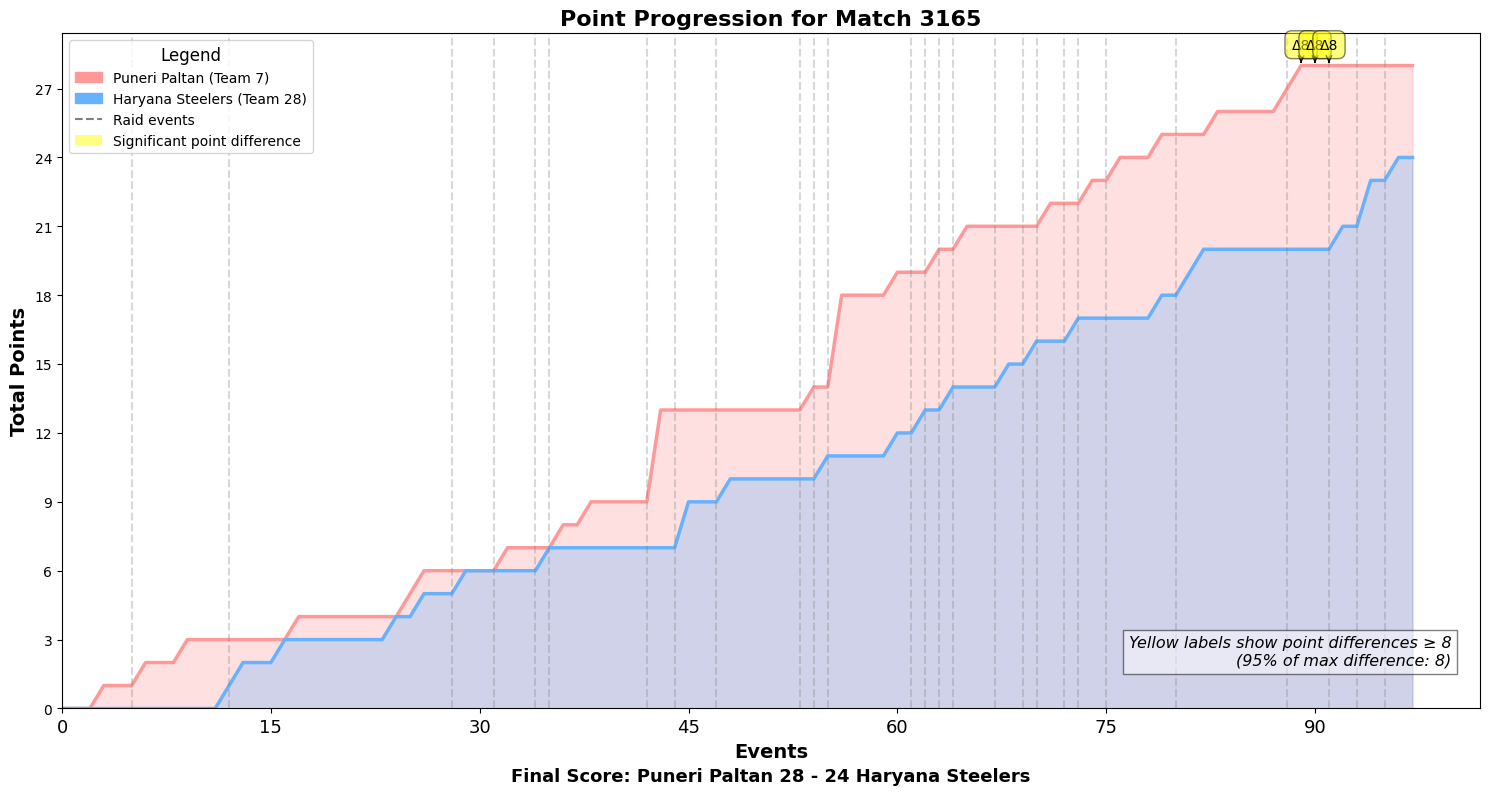

In [16]:
pkl.plot_point_progression(season=10, match_id=3165)


This was a very close match! Play-by-play events of this match can help identify the crucial junctures in this match.

In [17]:
events #play-by-play


,event_no,event_half,event,event_id,event_text,raider_id,raiding_team_id,defender_id,defending_team_id,raid_points,...,clock,status_id,score,seq_no,defenders,created_date,player_id,substituted_by,team_id,substitute_time
0,1,1,Empty Raid,3,Vinay empty raid,3054.0,28.0,NaN,7.0,0.0,...,20:00,0,"[0, 0]",1,[],2024-03-01T19:59:00,NaN,NaN,NaN,NaN
1,2,1,Empty Raid,3,Aslam Inamdar empty raid,4960.0,7.0,NaN,28.0,0.0,...,19:34,0,"[0, 0]",2,[],2024-03-01T19:59:31,NaN,NaN,NaN,NaN
2,3,1,Unsuccessful Raid,2,Shivam Patare unsuccessful raid,4108.0,28.0,3234.0,7.0,0.0,...,19:05,0,"[1, 0]",3,[3234],2024-03-01T20:00:09,NaN,NaN,NaN,NaN
3,4,1,Empty Raid,3,Mohit Goyat empty raid,4022.0,7.0,NaN,28.0,0.0,...,18:35,0,"[1, 0]",4,[],2024-03-01T20:00:43,NaN,NaN,NaN,NaN
4,5,1,Empty Raid,3,Vinay empty raid,3054.0,28.0,NaN,7.0,0.0,...,18:08,0,"[1, 0]",5,[],2024-03-01T20:01:13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,2,Successful Raid,1,Siddharth Desai raids successfully,2026.0,28.0,NaN,7.0,2.0,...,01:02,0,"[28, 23]",83,"[4960, 4925]",2024-03-01T21:02:55,NaN,NaN,NaN,NaN
94,95,2,Empty Raid,3,Mohit Goyat empty raid,4022.0,7.0,NaN,28.0,0.0,...,00:52,0,"[28, 23]",84,[],2024-03-01T21:03:29,NaN,NaN,NaN,NaN
95,97,2,Successful Raid,1,Siddharth Desai raids successfully,2026.0,28.0,NaN,7.0,1.0,...,00:24,0,"[28, 24]",85,[3234],2024-03-01T21:04:15,NaN,NaN,NaN,NaN
96,98,2,Yellow Card,10,None,NaN,NaN,NaN,NaN,NaN,...,00:07,0,None,0,NaN,2024-03-01T21:04:15,3234.0,NaN,NaN,NaN


In [18]:
zones # the zones of a Kabaddi mat for reference.


,id,name
0,1,Left Lobby
1,2,Right Lobby
2,3,Midline Left
3,4,Midline Centre
4,5,Midline Right
5,6,Baulk Left
6,7,Baulk Centre
7,8,Baulk Right
8,9,Bonus Left
9,10,Bonus Centre


In [19]:
breakdown_comparison.T


,0,1
team_id,7,28
team_name,Puneri Paltan,Haryana Steelers
raids_total,43,43
raids_successful,12,15
raids_unsuccessful,6,9
raids_empty,25,19
tackles_total,20,21
tackles_successful,9,5
tackles_unsuccessful,11,16
points_total,28,25


### Visualizing the team's performance againt each other

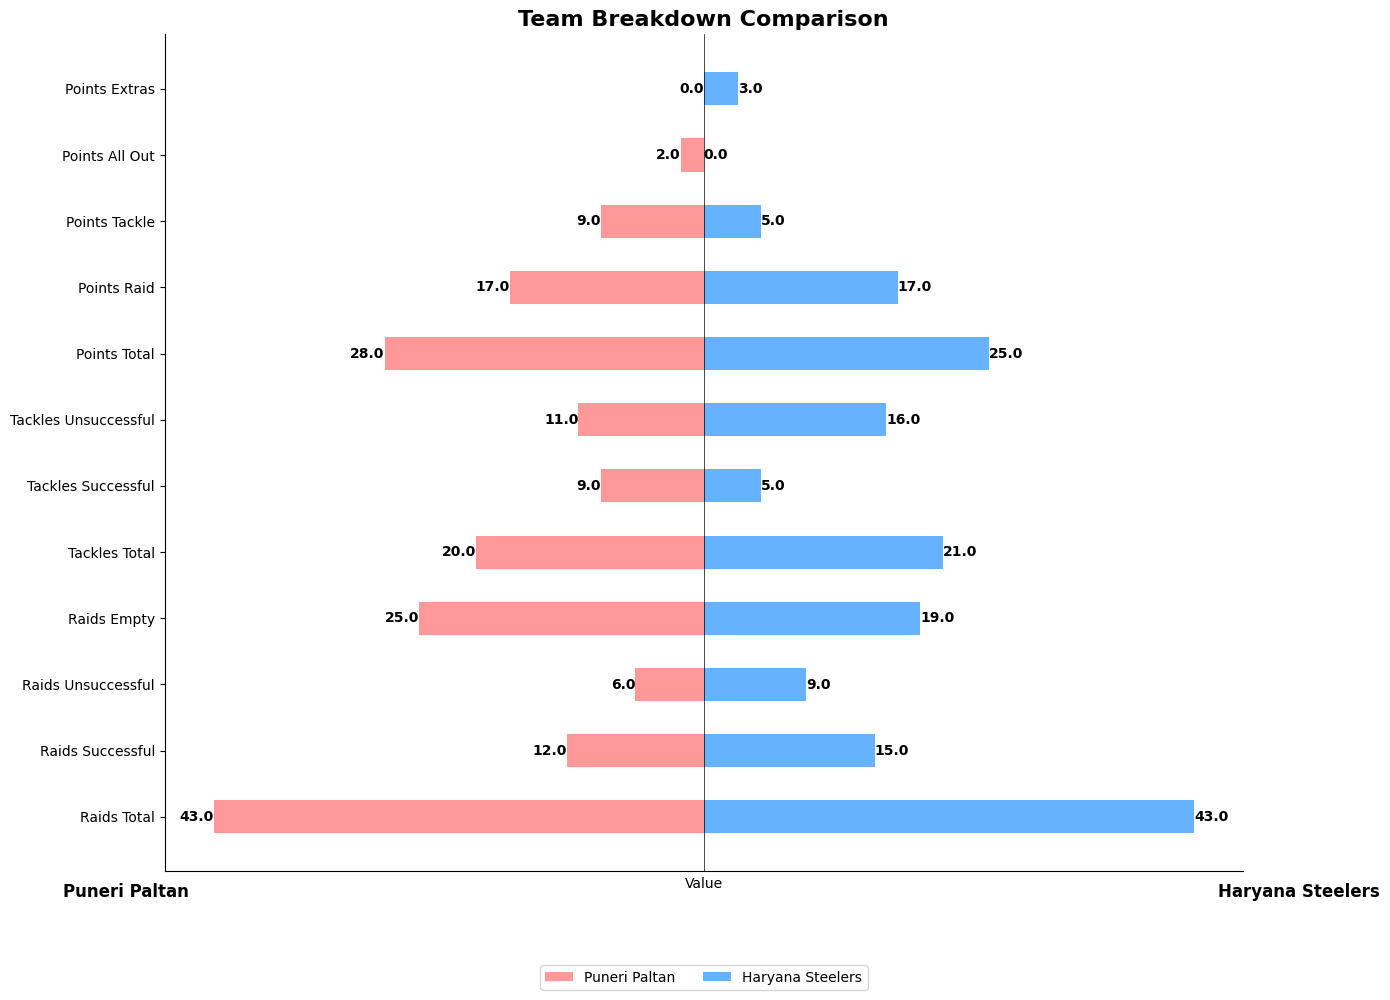

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_team_breakdown(breakdown_df):
    breakdown_df = breakdown_df.T
    # Prepare the data
    metrics = ['raids_total', 'raids_successful', 'raids_unsuccessful', 'raids_empty',
            'tackles_total', 'tackles_successful', 'tackles_unsuccessful',
            'points_total', 'points_raid', 'points_tackle', 'points_all_out', 'points_extras']

    team1_name = breakdown_df.loc['team_name', 0]
    team2_name = breakdown_df.loc['team_name', 1]

    team1_values = breakdown_df.loc[metrics, 0].astype(float)
    team2_values = breakdown_df.loc[metrics, 1].astype(float)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 10))
    y_pos = np.arange(len(metrics))

    # Create the horizontal bars on opposite sides
    ax.barh(y_pos, -team1_values, height=0.5, align='center', label=team1_name, color='#FF9999')
    ax.barh(y_pos, team2_values, height=0.5, align='center', label=team2_name, color='#66B2FF')

    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels([metric.replace('_', ' ').title() for metric in metrics])
    ax.set_xlabel('Value')
    ax.set_title('Team Breakdown Comparison', fontsize=16, fontweight='bold')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    # Add value labels on the bars
    for i, v in enumerate(team1_values):
        ax.text(-v, i, str(v), va='center', ha='right', fontweight='bold')
    for i, v in enumerate(team2_values):
        ax.text(v, i, str(v), va='center', ha='left', fontweight='bold')

    # Add a light grid
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the x-axis limits to be symmetric
    max_value = max(team1_values.max(), team2_values.max())
    ax.set_xlim(-max_value * 1.1, max_value * 1.1)

    # Add team names as x-axis labels
    ax.text(-max_value * 1.05, -1, team1_name, ha='right', va='top', fontsize=12, fontweight='bold')
    ax.text(max_value * 1.05, -1, team2_name, ha='left', va='top', fontsize=12, fontweight='bold')

    # Remove x-axis ticks
    ax.set_xticks([])

    # Add a vertical line at x=0
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# Call the function to plot the breakdown data
plot_team_breakdown(breakdown_comparison)


## Player Level Analysis 

`KabaddiPy` allows for studying granular level details of a player with `get_player_info()` and `get_matchwise_player_info()` alongside visual analysis of their strenghts and weakness areas

In [21]:
stats_rank, stats_value, stats_per_match = pkl.get_player_info(player_id=143, season=5)


In [22]:
stats_rank


,266
season,5
player_id,143
player_name,Maninder Singh
player_matches_played,21
player_position_id,8
player_position_name,Raider
team_id,4
team_full_name,Bengal Warriors
player-super-tackles_rank,NaN
player-raid-points_rank,5.0


In [23]:
stats_per_match


,266
season,5
player_id,143
player_name,Maninder Singh
player_matches_played,21
player_position_id,8
player_position_name,Raider
team_id,4
team_full_name,Bengal Warriors
player-super-tackles_points_per_match,NaN
player-raid-points_points_per_match,9.05


In [24]:
rvd_df = pkl.get_player_rvd(player_id=143, season=5)

rvd_df


,Season_Number,Team Name,player-id,Raider Name,Number of Defenders,Total Raids,Percentage of Raids,Empty Raids Percentage,Successful Raids Percentage
2693,5,Bengal Warriors,143,Maninder Singh,1,4,1%,NaN,100.00%
2694,5,Bengal Warriors,143,Maninder Singh,2,26,7.00%,7.70%,80.80%
2695,5,Bengal Warriors,143,Maninder Singh,3,20,5.00%,40.00%,45.00%
2696,5,Bengal Warriors,143,Maninder Singh,4,29,8.00%,55.20%,34.50%
2697,5,Bengal Warriors,143,Maninder Singh,5,51,14.00%,60.80%,15.70%
2698,5,Bengal Warriors,143,Maninder Singh,6,89,24.00%,31.50%,43.80%
2699,5,Bengal Warriors,143,Maninder Singh,7,148,40.00%,37.80%,46.60%


Another interesting plot is the successful raid percentage vs number of defenders across seasons for a particular raider. We make a plot for this below...

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


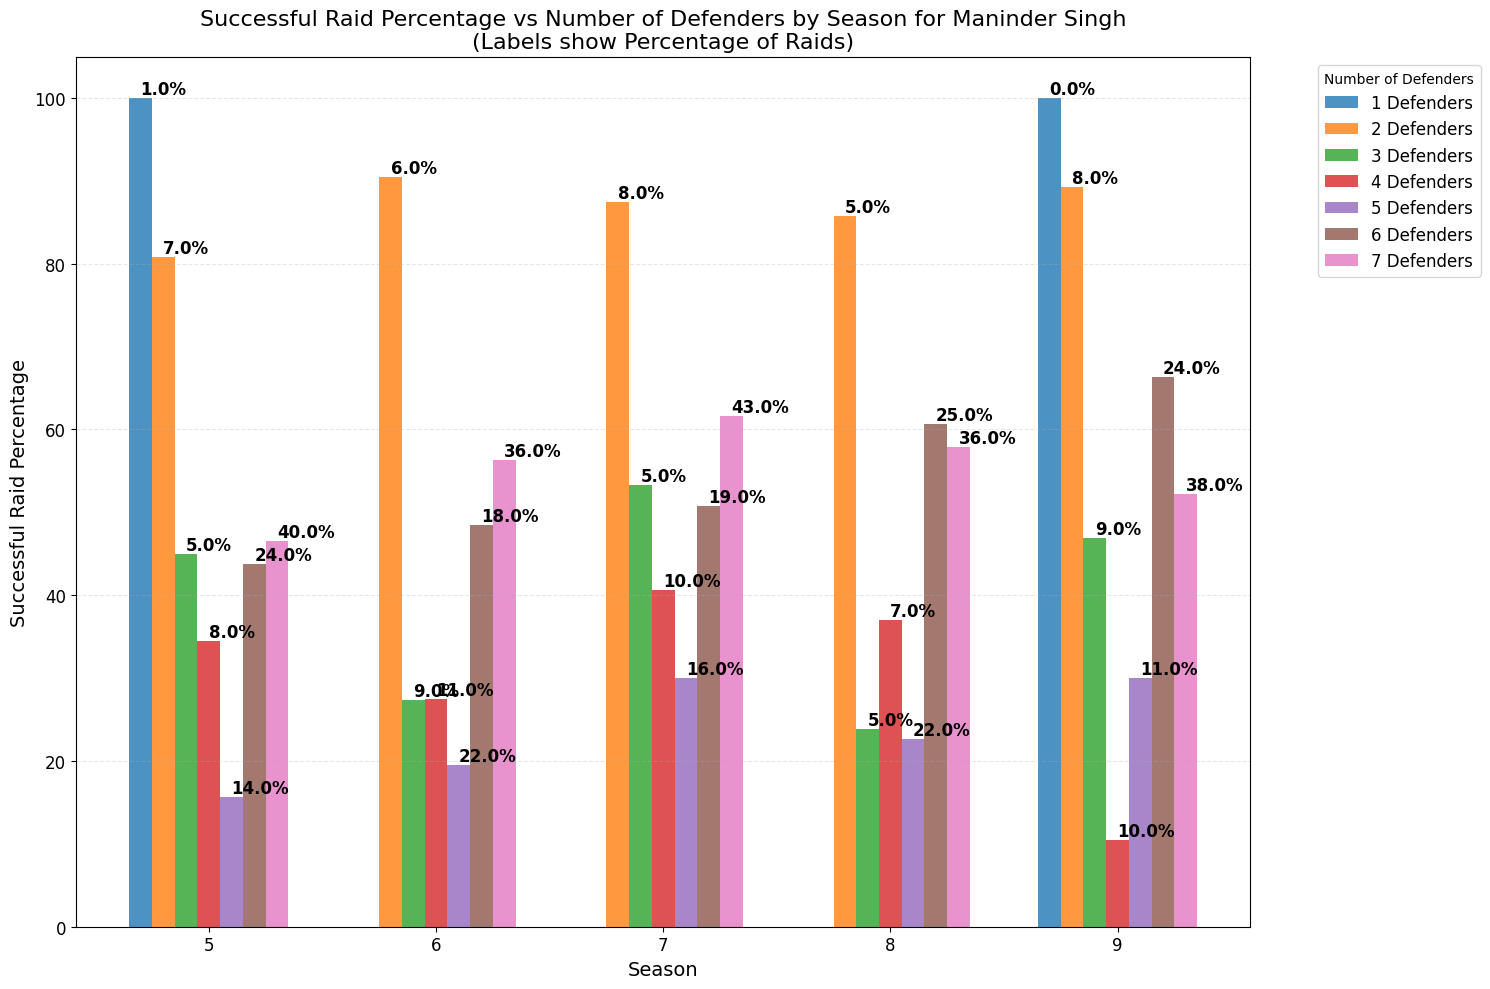

In [25]:
rvd_df_all_seasons = pkl.get_player_rvd(player_id=143)

def plot_raid_percentages(df):


    df.rename(columns={'Successful Raids Percentage': 'Successful_Raid_Percentage', 'Number of Defenders': 'Number_of_Defenders','Percentage of Raids': 'Percentage_of_Raids' }, inplace=True)
    
    df['Successful_Raid_Percentage'] = df['Successful_Raid_Percentage'].astype(str).str.rstrip('%').astype('float')
    df['Percentage_of_Raids'] = df['Percentage_of_Raids'].astype(str).str.rstrip('%').astype('float')
    
    # Group the data by Season_Number and Number_of_Defenders
    grouped_success = df.groupby(['Season_Number', 'Number_of_Defenders'])['Successful_Raid_Percentage'].mean().unstack()
    grouped_percentage = df.groupby(['Season_Number', 'Number_of_Defenders'])['Percentage_of_Raids'].mean().unstack()


    fig, ax = plt.subplots(figsize=(15, 10))
    
    bar_width = 0.1
    index = np.arange(len(grouped_success.index))
    
    # Plot Successful Raid Percentage with Percentage of Raids as labels
    for i, defenders in enumerate(grouped_success.columns):
        bars = ax.bar(index + i*bar_width, grouped_success[defenders], bar_width, 
                      label=f'{defenders} Defenders', alpha=0.8)
        
        # Add Percentage of Raids as labels on top of bars with larger font size
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{grouped_percentage[defenders].iloc[j]:.1f}%',
                    ha='left', va='bottom', rotation=0, fontsize=12, fontweight='bold')

    ax.set_xlabel('Season', fontsize=14)  
    ax.set_ylabel('Successful Raid Percentage', fontsize=14) 
    ax.set_title(f'Successful Raid Percentage vs Number of Defenders by Season for {df["Raider Name"].iloc[0]}\n(Labels show Percentage of Raids)', fontsize=16)
    ax.set_xticks(index + bar_width*(len(grouped_success.columns)-1)/2)
    ax.set_xticklabels(grouped_success.index, fontsize=12) 
    ax.tick_params(axis='y', labelsize=12) 
    ax.legend(title='Number of Defenders', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12) 
    ax.grid(True, linestyle='--', alpha=0.3, axis='y')

    plt.tight_layout()

    # plt.savefig("rvd_vis.png", bbox_inches='tight', pad_inches=0, dpi=400)
    plt.show()



plot_raid_percentages(rvd_df_all_seasons)


Lastly another interesting dataframe is the `get_matchwise_player_info()` which returns the performance of a player in a match.

In [26]:
player_matches_info = pkl.get_matchwise_player_info(player_id=143, season=5)

display(player_matches_info)


,match_id,date,team_name,team_score,opponent_name,opponent_score,played,starter,on_court,captain,...,yellow_card_count,red_card_count,top_raider,top_defender,substitutions,first_substitution_time,matches_played,matches_started,average_points_full_season,total_substitutions_full_season
0,420,10/24/2017,Bengal Warriors,17,Gujarat Fortunegiants,42,True,True,False,False,...,0,0,False,False,2,NaN,21,21,9.142857,16
1,345,9/3/2017,Bengal Warriors,29,Tamil Thalaivas,25,True,True,True,False,...,0,0,True,False,0,NaN,21,21,9.142857,16
2,375,9/23/2017,Bengal Warriors,33,Bengaluru Bulls,29,True,True,True,False,...,0,0,True,False,0,NaN,21,21,9.142857,16
3,408,10/13/2017,Bengal Warriors,34,Tamil Thalaivas,30,True,True,True,False,...,0,0,True,False,0,NaN,21,21,9.142857,16
4,343,9/2/2017,Bengal Warriors,26,U.P. Yoddha,26,True,True,True,False,...,0,0,True,False,2,NaN,21,21,9.142857,16
5,358,9/12/2017,Bengal Warriors,32,Telugu Titans,31,True,True,True,False,...,0,0,False,False,0,NaN,21,21,9.142857,16
6,397,10/06/2017,Bengal Warriors,25,Puneri Paltan,19,True,True,True,False,...,0,0,True,False,0,NaN,21,21,9.142857,16
7,341,9/1/2017,Bengal Warriors,41,Patna Pirates,38,True,True,True,False,...,0,0,True,False,4,7.0,21,21,9.142857,16
8,368,9/17/2017,Bengal Warriors,37,Patna Pirates,37,True,True,True,False,...,0,0,True,False,0,NaN,21,21,9.142857,16
9,351,9/7/2017,Bengal Warriors,31,Dabang Delhi K.C.,31,True,True,False,False,...,0,0,True,False,2,NaN,21,21,9.142857,16


## Plotting the player weak zones

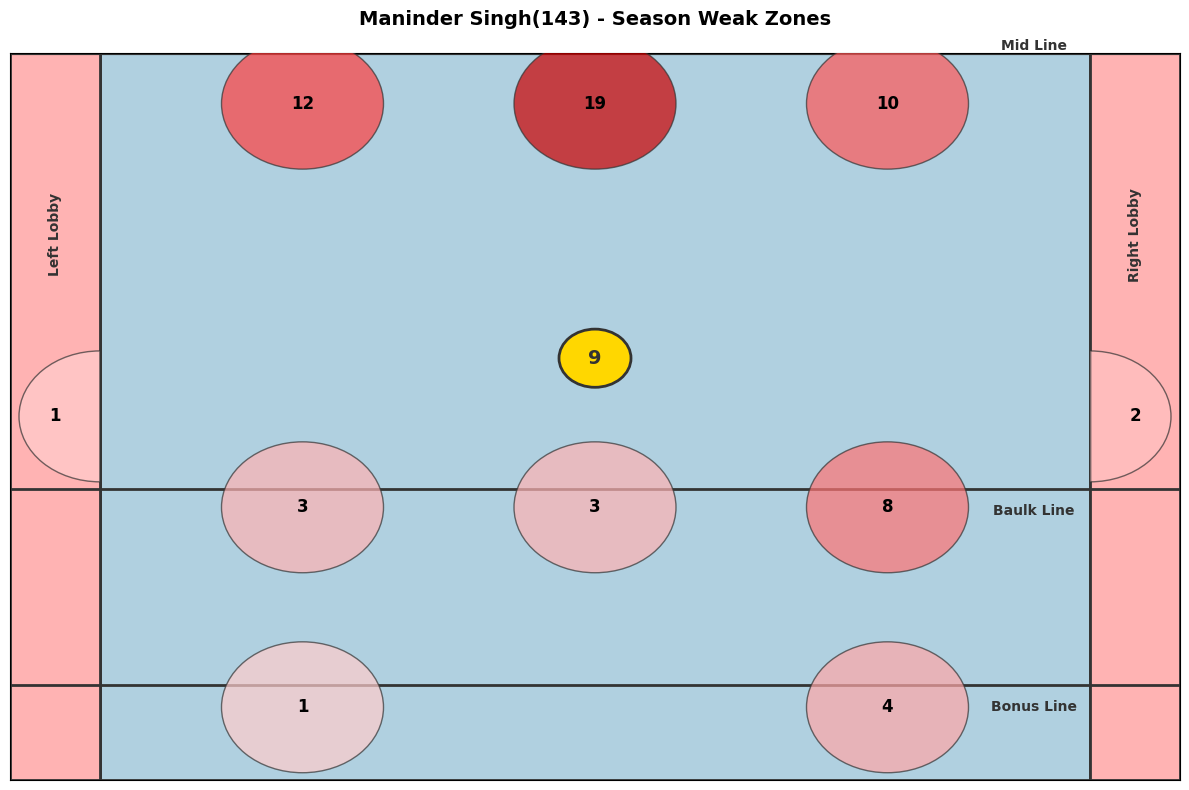

In [27]:
pkl.plot_player_zones(143, season=5, zone_type="weak")


In [28]:
# End of Exemplar Notebook

# Links:
# Github Repo: https://github.com/kabaddiPy/kabaddiPy
# PyPI: https://pypi.org/project/kabaddiPy/
# Docs: https://kabaddipy.github.io/kabaddiPy/
